CS 282 (Computer Vision) <br>
Programming Assignment 1 <br>
OpenCV Exercises <br>
Image Enhancement <br>

Professor: Dr. Prospero C. Naval Jr. <br>
Student: Deomary Angelo B. Franco, 202322049 <br>


In [1]:
import cv2
import logging
import numpy as np

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(message)s'
)

logging.info("OpenCV version: %s", cv2.__version__)

2026-01-31 02:27:41,841 - OpenCV version: 4.11.0


# Item 1
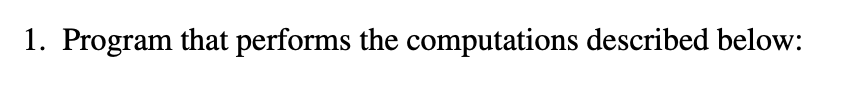

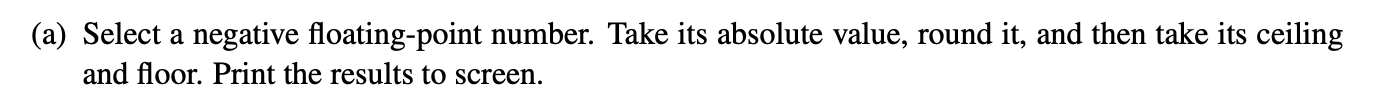

In [ ]:
negative_floating_point_number = -2.72
logging.info(f'Negative floating point number: {negative_floating_point_number}')

absolute_value = cv2.absdiff(negative_floating_point_number, 0.0)[0][0]
logging.info(f'Absolute value: {absolute_value}')

ceiling_value = cv2.convertScaleAbs(negative_floating_point_number)[0][0]
logging.info(f'Ceiling value: {ceiling_value}')

floor = ceiling_value - 1
logging.info(f'Floor value: {floor}')

2026-01-31 02:36:21,663 - Negative floating point number: -2.72
2026-01-31 02:36:21,664 - Absolute value: 2.72
2026-01-31 02:36:21,664 - Ceiling value: 3
2026-01-31 02:36:21,665 - Floor value: 2


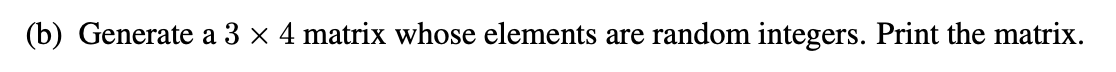



In [41]:
matrix_3x4 = cv2.randu(np.ones((3, 4), dtype=np.uint8), 0, 10)
logging.info(f'3x4 Matrix:\n{matrix_3x4}')
logging.info(f'Matrix shape: {matrix_3x4.shape}')
logging.info(f'Matrix data type: {matrix_3x4.dtype}')

2026-01-31 02:51:52,066 - 3x4 Matrix:
[[5 0 5 3]
 [0 2 7 1]
 [7 9 8 8]]
2026-01-31 02:51:52,067 - Matrix shape: (3, 4)
2026-01-31 02:51:52,067 - Matrix data type: uint8


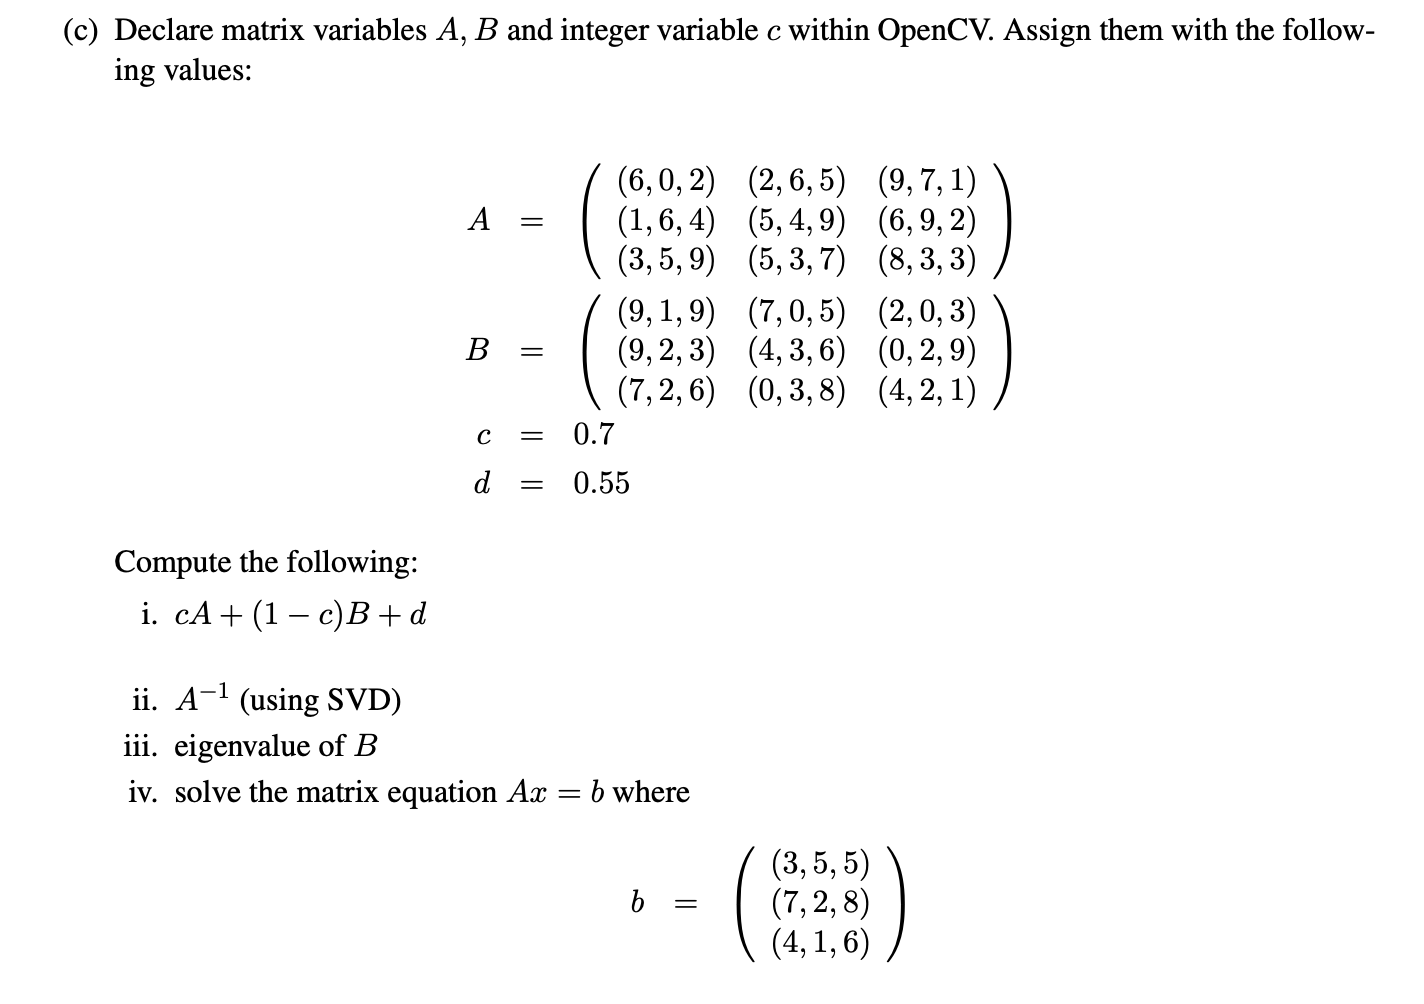  
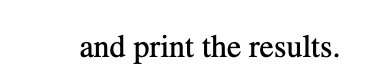

In [125]:
A_ = np.array([
    [[6, 0, 2], [2, 6, 5], [9, 7, 1]],
    [[1, 6, 4], [5, 4, 9], [6, 9, 2]],
    [[3, 5, 9], [5, 3, 7], [8, 3, 3]],
], dtype=np.float32)

A = cv2.Mat(A_)
logging.info(f'3x3x3 Matrix A:\n{A}')

B_ = np.array([
    [[9, 1, 9], [7, 0, 5], [2, 0, 3]],
    [[9, 2, 3], [4, 3, 6], [0, 2, 9]],
    [[7, 2, 6], [0, 3, 8], [4, 2, 1]],
], dtype=np.float32)

B = cv2.Mat(B_)
logging.info(f'3x3x3 Matrix B:\n{B}')

c = 0.7
d = 0.55

b_ = np.array([
    [3, 5, 5],
    [7, 2, 8],
    [4, 1, 6]
], dtype=np.float32)
b = cv2.Mat(b_)
logging.info(f'3x3x3 Matrix b:\n{b}')

2026-01-31 04:21:00,957 - 3x3x3 Matrix A:
[[[6. 0. 2.]
  [2. 6. 5.]
  [9. 7. 1.]]

 [[1. 6. 4.]
  [5. 4. 9.]
  [6. 9. 2.]]

 [[3. 5. 9.]
  [5. 3. 7.]
  [8. 3. 3.]]]
2026-01-31 04:21:00,960 - 3x3x3 Matrix B:
[[[9. 1. 9.]
  [7. 0. 5.]
  [2. 0. 3.]]

 [[9. 2. 3.]
  [4. 3. 6.]
  [0. 2. 9.]]

 [[7. 2. 6.]
  [0. 3. 8.]
  [4. 2. 1.]]]
2026-01-31 04:21:00,962 - 3x3x3 Matrix b:
[[3. 5. 5.]
 [7. 2. 8.]
 [4. 1. 6.]]


In [164]:
weighted_sum = cv2.addWeighted(A, c, B, 1-c, d)
logging.info(f'i. \nThe weighed sum is: \n {weighted_sum}')

2026-01-31 04:45:56,498 - i. 
The weighed sum is: 
 [[[7.45 0.85 4.65]
  [4.05 4.75 5.55]
  [7.45 5.45 2.15]]

 [[3.95 5.35 4.25]
  [5.25 4.25 8.65]
  [4.75 7.45 4.65]]

 [[4.75 4.65 8.65]
  [4.05 3.55 7.85]
  [7.35 3.25 2.95]]]


In [170]:
inverses = []
for _a in cv2.split(A_):
    w, u, vt = cv2.SVDecomp(_a)
    inv_a = vt.T @ np.diag(1 / w[:, 0]) @ u.T
    inverses.append(inv_a)

inverse_A = cv2.merge(inverses)
logging.info(f'ii. \nThe inverse of A, when using SVD, is: \n {inverse_A}')

2026-01-31 04:49:53,563 - ii. 
The inverse of A, when using SVD, is: 
 [[[-1.0000005e+00 -1.0135134e-01  4.3333316e+00]
  [-2.9000010e+00  2.0270295e-02 -2.6666656e+00]
  [ 3.3000014e+00  1.7567565e-01  3.3333322e-01]]

 [[-1.0000002e+00  1.8243243e-01  1.9999992e+00]
  [-2.1000006e+00 -2.3648646e-01 -9.9999946e-01]
  [ 2.7000008e+00  2.8378376e-01 -6.2145446e-08]]

 [[ 1.0000002e+00 -1.3513520e-02 -1.7666660e+01]
  [ 2.4000006e+00  2.0270269e-01  1.0333329e+01]
  [-2.8000009e+00 -2.4324326e-01 -6.6666621e-01]]]


In [173]:
eigen_values = []
for _b in cv2.split(B_):
    _, eigen_value, eigen_vector = cv2.eigen(_b)
    eigen_values.append(eigen_value)

eigen_values_B = cv2.merge(eigen_values)
logging.info(f'ii. \nThe eigenvalue of B is: \n {eigen_values_B}')

2026-01-31 04:51:07,347 - ii. 
The eigenvalue of B is: 
 [[[14.197403    4.561553   17.032358  ]]

 [[ 3.9999998   1.          4.8394666 ]]

 [[-1.1974022   0.43844712 -5.8718247 ]]]


In [178]:
eigen_value.shape

(3, 1)

In [96]:
cv2.split(b)

(array([[3., 5., 5.],
        [7., 2., 8.],
        [4., 1., 6.]], dtype=float32),)